In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import tree


In [2]:
import seaborn as sns
df=sns.load_dataset('titanic')

In [3]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
df = df.drop(['age','deck','embark_town','embarked'],1)

C:\Users\JEJURKAR\AppData\Local\Temp/ipykernel_14792/4002048906.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['age','deck','embark_town','embarked'],1)


In [5]:
df

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [6]:
df.isnull().sum()

survived      0
pclass        0
sex           0
sibsp         0
parch         0
fare          0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [7]:
df.duplicated().sum()

388

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df['sex'].replace(['male','female'],[0,1],inplace=True)

C:\Users\JEJURKAR\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [11]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [12]:
df['alive'] = df['alive'].map(
                   {'yes':1 ,'no':0})

C:\Users\JEJURKAR\AppData\Local\Temp/ipykernel_14792/751641064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alive'] = df['alive'].map(


In [13]:
df=df.drop('who',1)

C:\Users\JEJURKAR\AppData\Local\Temp/ipykernel_14792/2202077312.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('who',1)


In [14]:
df=df.drop('class',1)

C:\Users\JEJURKAR\AppData\Local\Temp/ipykernel_14792/3791318868.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('class',1)


In [15]:
x=df.drop('survived',1)

C:\Users\JEJURKAR\AppData\Local\Temp/ipykernel_14792/2639322056.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=df.drop('survived',1)


In [16]:
x

,pclass,sex,sibsp,parch,fare,adult_male,alive,alone
0,3,0,1,0,7.2500,True,0,False
1,1,1,1,0,71.2833,False,1,False
2,3,1,0,0,7.9250,False,1,True
3,1,1,1,0,53.1000,False,1,False
4,3,0,0,0,8.0500,True,0,True
...,...,...,...,...,...,...,...,...
879,1,1,0,1,83.1583,False,1,False
882,3,1,0,0,10.5167,False,0,True
885,3,1,0,5,29.1250,False,0,False
887,1,1,0,0,30.0000,False,1,True


In [17]:
df

,survived,pclass,sex,sibsp,parch,fare,adult_male,alive,alone
0,0,3,0,1,0,7.2500,True,0,False
1,1,1,1,1,0,71.2833,False,1,False
2,1,3,1,0,0,7.9250,False,1,True
3,1,1,1,1,0,53.1000,False,1,False
4,0,3,0,0,0,8.0500,True,0,True
...,...,...,...,...,...,...,...,...,...
879,1,1,1,0,1,83.1583,False,1,False
882,0,3,1,0,0,10.5167,False,0,True
885,0,3,1,0,5,29.1250,False,0,False
887,1,1,1,0,0,30.0000,False,1,True


In [18]:
y=df.survived

In [19]:
y

0      0
1      1
2      1
3      1
4      0
      ..
879    1
882    0
885    0
887    1
888    0
Name: survived, Length: 503, dtype: int64

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [21]:
from sklearn import tree

In [22]:
classifier = tree.DecisionTreeClassifier(max_depth=4)

In [23]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

[Text(418.5, 407.70000000000005, 'X[6] <= 0.5\ngini = 0.499\nsamples = 402\nvalue = [210, 192]'),
 Text(209.25, 135.89999999999998, 'gini = 0.0\nsamples = 210\nvalue = [210, 0]'),
 Text(627.75, 135.89999999999998, 'gini = 0.0\nsamples = 192\nvalue = [0, 192]')]

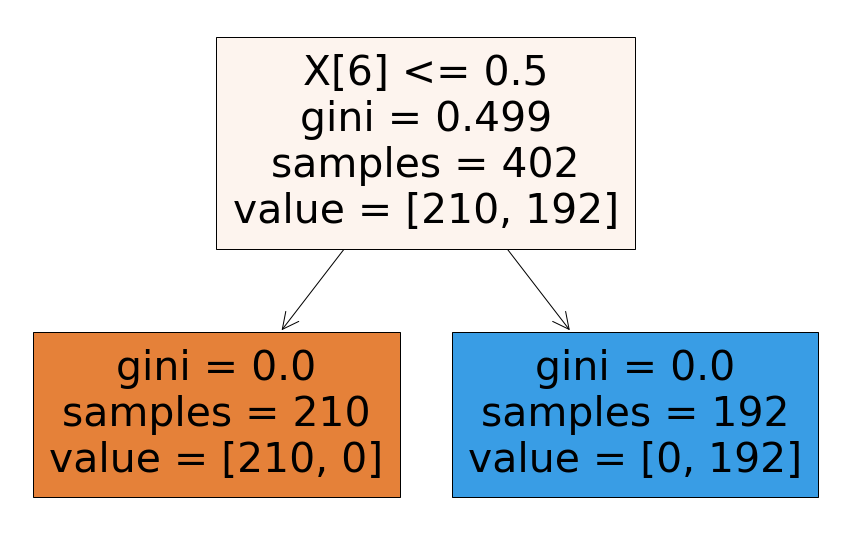

In [24]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [25]:
classifier.score(x_test,y_test)

1.0